In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# カルフォルニア大学アーバイン校の公開URLからデータセットをダウンロード
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -o bank-additional.zip

--2019-08-05 12:07:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.3’

bank-additional.zip 100%[===================>] 434.15K  1.31MB/s    in 0.3s    

2019-08-05 12:07:56 (1.31 MB/s) - ‘bank-additional.zip.3’ saved [444572/444572]

Archive:  bank-additional.zip
  inflating: bank-additional/.DS_Store  
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [8]:
# bank-additional-full.csvをdataへ格納
data = pd.read_csv('./bank-additional/bank-additional-full.csv', sep=';')
 
# 最初の10行を表示
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
data.shape

(41188, 21)

In [10]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## 円グラフ

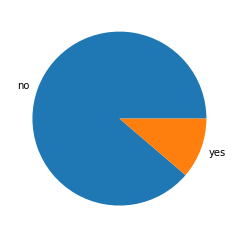

In [11]:
y_label = data['y'].value_counts(ascending=False, normalize=True).index
y_vals = data['y'].value_counts(ascending=False, normalize=True).values


plt.pie(y_vals, labels=y_label)
#plt.axis('equal')
plt.show()

age


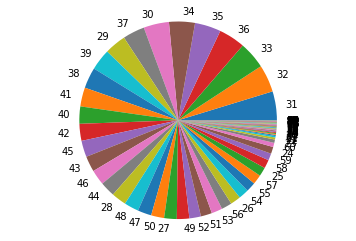

duration


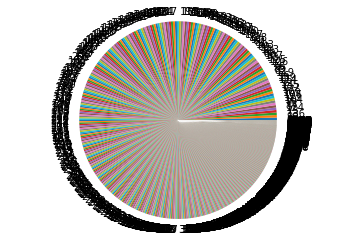

campaign


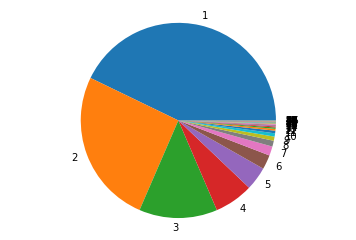

pdays


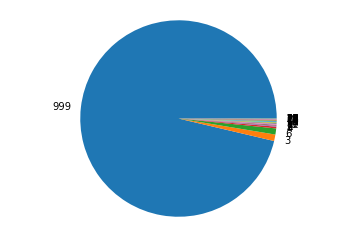

previous


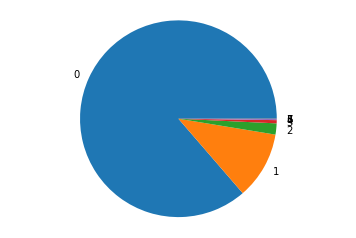

emp.var.rate


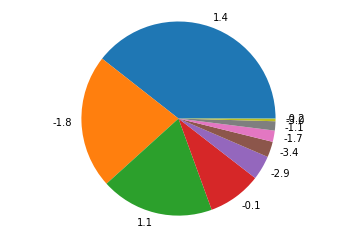

cons.price.idx


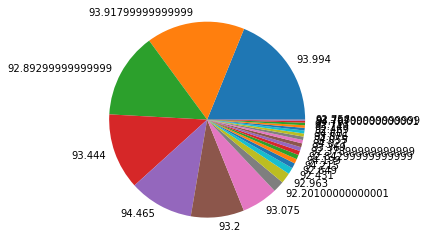

cons.conf.idx


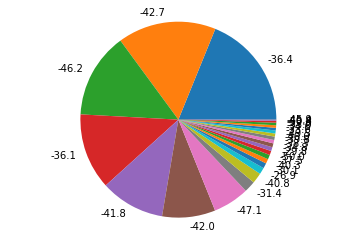

euribor3m


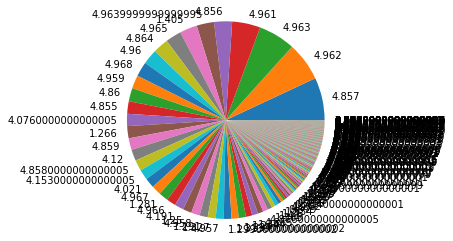

nr.employed


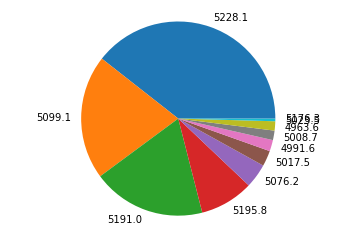

In [0]:
for column_name in data.select_dtypes(exclude=['object']).columns:
    print(column_name)
    job_label = data[column_name].value_counts(ascending=False, normalize=True).index
    job_vals = data[column_name].value_counts(ascending=False, normalize=True).values


    plt.pie(job_vals, labels=job_label)
    plt.axis('equal')
    plt.show()

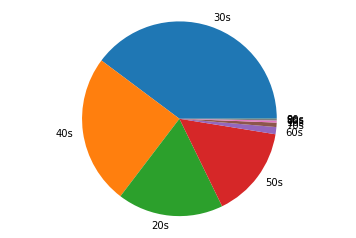

In [0]:
y_label = data['age_group'].value_counts(ascending=False, normalize=True).index
y_vals = data['age_group'].value_counts(ascending=False, normalize=True).values


plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

job


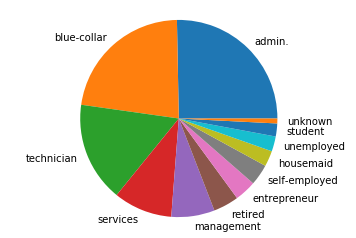

marital


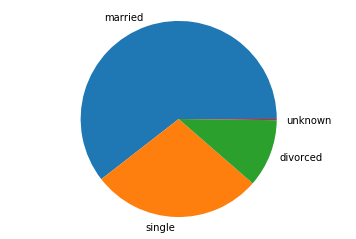

education


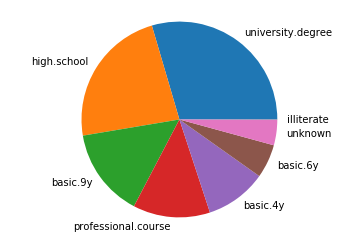

default


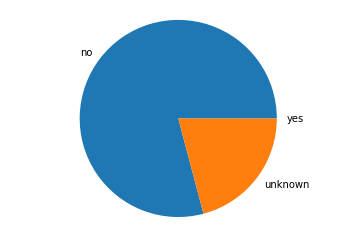

housing


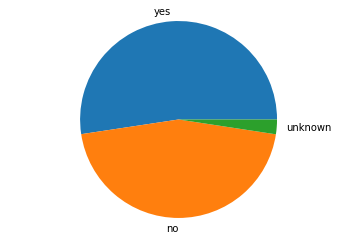

loan


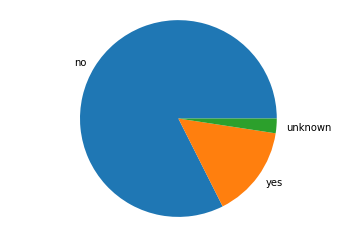

contact


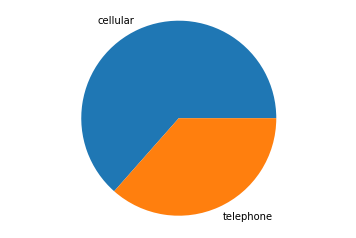

month


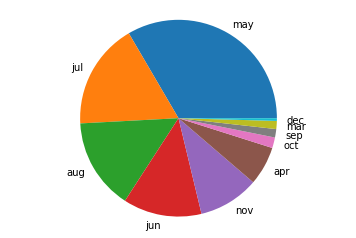

day_of_week


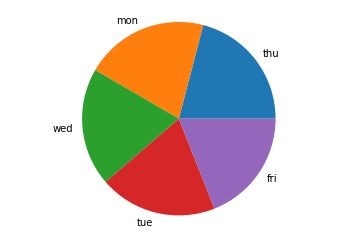

poutcome


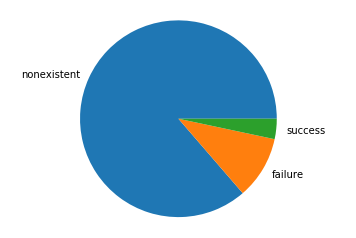

y


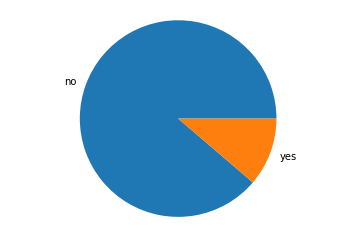

In [0]:
for column_name in data.select_dtypes(include=['object']).columns:
    print(column_name)
    job_label = data[column_name].value_counts(ascending=False, normalize=True).index
    job_vals = data[column_name].value_counts(ascending=False, normalize=True).values


    plt.pie(job_vals, labels=job_label)
    plt.axis('equal')
    plt.show()

## 箱ひげ図

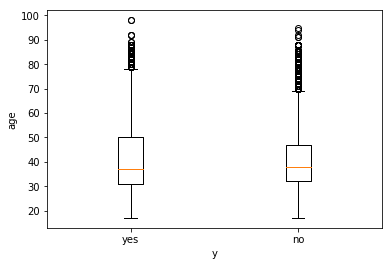

In [0]:
# 箱ひげ
y_yes = data[data['y'] == 'yes']
y_no = data[data['y'] == 'no']
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels = ['yes', 'n'])


age


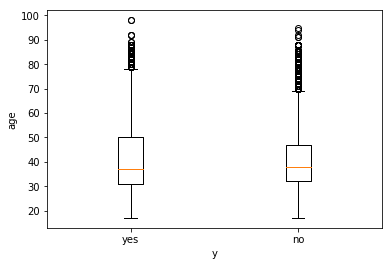

duration


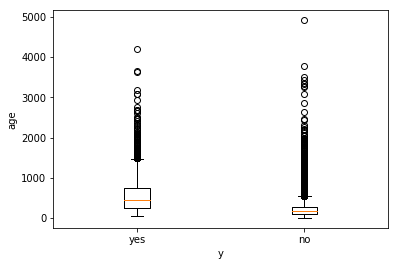

campaign


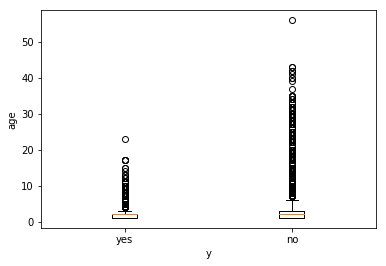

pdays


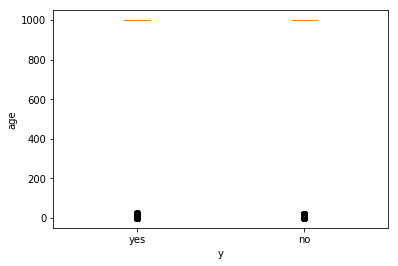

previous


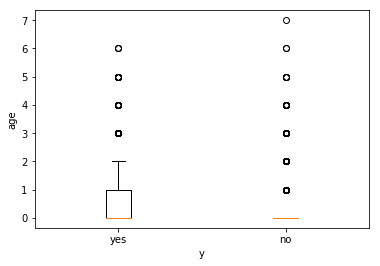

emp.var.rate


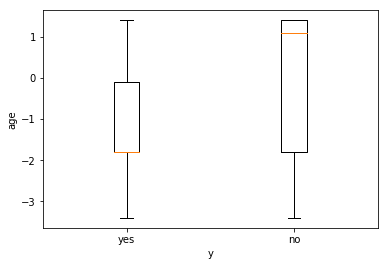

cons.price.idx


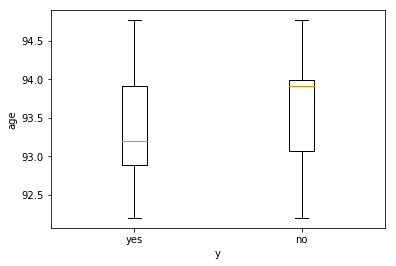

cons.conf.idx


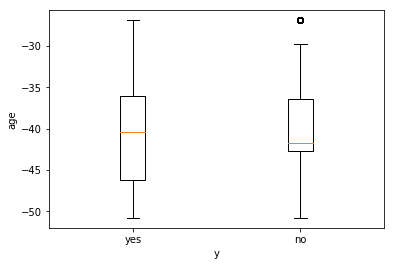

euribor3m


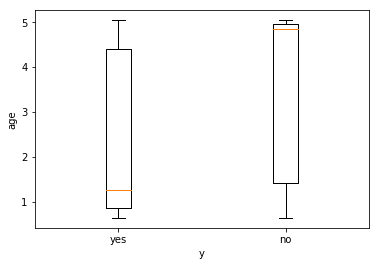

nr.employed


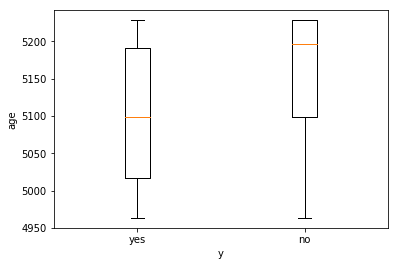

In [0]:
y_yes = data[data['y'] == 'yes']
y_no = data[data['y'] == 'no']
for column_name in data.select_dtypes(include=['int64','float64']).columns:
  print(column_name)
  y_column_name = [y_yes[column_name], y_no[column_name]]

  plt.boxplot(y_column_name)
  plt.xlabel('y')
  plt.ylabel('age')
  ax = plt.gca()
  plt.setp(ax, xticklabels = ['yes', 'no'])
  plt.show()

## 特徴エンジニアリング

In [4]:
# 働いているか、働いていないかを区別するフラグの追加
data['job_flag'] = 'not-working'
data.loc[(data['job'] == 'managemant')   | 
         (data['job'] == 'technician')   |
         (data['job'] == 'blue-collar')  |
         (data['job'] == 'admin')        |
         (data['job'] == 'services')     |
         (data['job'] == 'self-employed')|
         (data['job'] == 'entrepreneur') |
         (data['job'] == 'housemaid'), 'job_flag'] = 'worker'

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_flag
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,worker
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,worker
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,worker
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,not-working
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,worker


In [0]:
data.loc[(data['month'] == 'jan')  | 
         (data['month'] == 'feb')  |
         (data['month'] == 'mar'), 'quarter'] = '1Q'

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,no_previous_contact,not_working,job2,month2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s,1,0,worker,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s,1,0,worker,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30s,1,0,worker,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30s,1,0,not_worker,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s,1,0,worker,NaN


In [0]:
data.groupby('month').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,no_previous_contact,not_working
month,,,,,,,,,,,,
apr,40.593845,293.200608,1.947188,955.587386,0.323328,-1.800000,93.119558,-46.273632,1.361070,5093.123708,0.956307,0.120441
aug,41.644221,232.430722,2.666559,961.062156,0.115410,0.747151,93.311065,-35.597184,4.300623,5200.248349,0.961800,0.093720
dec,47.307692,345.609890,2.159341,748.060440,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,0.747253,0.346154
jul,39.035545,273.426122,3.160998,982.700725,0.047115,1.158921,93.894923,-42.370170,4.685678,5214.078575,0.983552,0.075411
jun,39.766077,242.561301,3.072208,970.221512,0.083114,0.688379,94.245402,-41.579428,4.256908,5197.493193,0.971042,0.083490
mar,40.778388,245.946886,2.203297,835.454212,0.483516,-1.800000,93.097330,-42.650549,1.162745,5055.390110,0.835165,0.225275
may,39.031084,261.231752,2.439756,981.120415,0.164209,-0.164972,93.528882,-40.579272,3.293665,5149.521592,0.981989,0.059917
nov,40.965618,245.855645,1.909290,952.950256,0.293587,-0.418483,93.200943,-41.238747,3.723123,5173.031236,0.953670,0.083882
oct,44.171309,288.367688,1.545961,781.909471,0.647632,-2.438579,93.175107,-34.580919,1.200123,5018.823816,0.781337,0.288301


## 演習 １Qの作成を参考に「2Q」、「3Q」、「4Q」を作成してください。

In [0]:
data.loc[(data['month'] == 'apr')  | 
         (data['month'] == 'may')  |
         (data['month'] == 'jun'), 'quarter'] = '2Q'

data.loc[(data['month'] == 'jul')  | 
         (data['month'] == 'aug')  |
         (data['month'] == 'sep'), 'quarter'] = '3Q'

data.loc[(data['month'] == 'oct')  | 
         (data['month'] == 'nov')  |
         (data['month'] == 'dec'), 'quarter'] = '4Q'

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,quarter
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s,2Q
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s,2Q
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30s,2Q
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30s,2Q
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50s,2Q


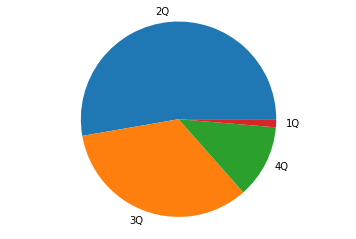

In [0]:
y_label = data['quarter'].value_counts(ascending=False, normalize=True).index
y_vals = data['quarter'].value_counts(ascending=False, normalize=True).values


plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

## 演習

## キャンペーン以前に銀行が連絡した回数を示す「previous」について、連絡なしの場合を「0」、連絡が１回以上されている場合を「1」とする新しい項目「previous_flg」を作成して下さい。

In [0]:
data.loc[data['previous'] == 0, 'previous_flg' ] = 0
data.loc[data['previous'] >= 1, 'previous_flg' ] = 1

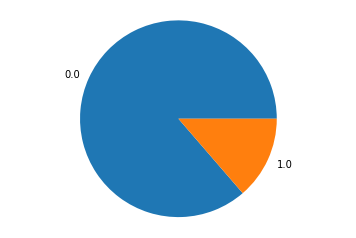

In [0]:
y_label = data['previous_flg'].value_counts(ascending=False, normalize=True).index
y_vals = data['previous_flg'].value_counts(ascending=False, normalize=True).values


plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

## 演習

## 通話時間「duration」の平均値を求めて、平均値以下の通話時間を「short」、平均値より長い通話時間を「long」として、新しい項目「duration_flg」を作成して下さい。

In [0]:
duration_mean = data['duration'].mean()

In [0]:
data.loc[data['duration'] <= duration_mean, 'duration_flg' ] = 'short'
data.loc[data['duration'] > duration_mean,  'duration_flg' ] = 'long'

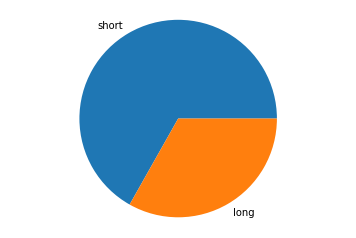

In [0]:
y_label = data['duration_flg'].value_counts(ascending=False, normalize=True).index
y_vals = data['duration_flg'].value_counts(ascending=False, normalize=True).values


plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()